In [ ]:
import os
import tweepy as tw
import pandas as pd
from tqdm import tqdm, notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [ ]:
%run ./Keys.ipynb

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_words = "#covid19 -filter:retweets"
date_since = "2020-03-01"
# Collect tweets
tweets = tw.Cursor(api.search_tweets, q=search_words,lang="en", since=date_since).items(12452)

In [ ]:
tweets_copy = []
for tweet in tqdm(tweets):
     tweets_copy.append(tweet)

In [ ]:
print(f"new tweets retrieved: {len(tweets_copy)}")

In [ ]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))

In [ ]:
tweets_df.head()

In [2]:
tweets_df.to_csv('covid19_tweets.csv')

NameError: name 'tweets_df' is not defined

In [3]:
import pandas as pd

In [4]:
tweets_df = pd.read_csv("covid19_tweets.csv")

In [5]:
tweets_df.columns

Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
tweets_df['source'].unique

<bound method Series.unique of 0         Twitter for iPad
1          Twitter Web App
2          Twitter Web App
3                TweetDeck
4              TheAllINeed
              ...         
368        Twitter Web App
369        Twitter Web App
370        Twitter Web App
371    Twitter for Android
372    Twitter for Android
Name: source, Length: 373, dtype: object>

In [8]:
tweets_df['source'].value_counts()

Twitter Web App                    155
Twitter for iPhone                  58
Twitter for Android                 48
TweetDeck                           18
Hootsuite Inc.                       8
HN_Comments                          6
LinkedIn                             5
Microsoft Power Platform             5
IFTTT                                5
Buffer                               4
Liverpool University Repository      4
Cheap Bots, Done Quick!              3
Sprout Social                        3
FS twitter poster for GPE            2
The Social Jukebox                   2
Valurank                             2
Twitter Media Studio                 2
HubSpot                              2
trackingbot2020                      2
twittbot.net                         2
Twitter for iPad                     2
CoronaVirus Bot by Sloth             2
COVID19-Updates                      2
Hocalwire Social Share               2
ETRetail.com                         2
drumup.io                

### Tweetlerde Test Analizi

In [9]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [10]:
import neattext.functions as nfx

In [11]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
tweets_df['text']

0      Association Between Time Interval from #COVID1...
1      Threat In India From New Covid Variant Of BF.7...
2      If Illinois is any better off financially for ...
3      DOH reports 1,196 new #COVID19 cases, 34 death...
4      #Qatar World Cup spy apps\n#COVID19 #Ehteraz #...
                             ...                        
368    #Byju’s standalone business reported a loss fo...
369    New from @Airfinity - #vaccine prices increase...
370    #COVID19 has caused a reduction in life expect...
371    #Omicron subvariant BF.7, which is leading to ...
372    Experts slam Boston lab where scientists have ...
Name: text, Length: 373, dtype: object

### Twitleri Gürültülerden Temizleme
+Twittlerdeki bahsetmeleri, hashtagleri, url ve emojileri kaldırma

In [13]:
tweets_df['text'].apply(nfx.extract_hashtags)

0      [#COVID19, #Vaccination, #Fertilization, #Preg...
1      [#OmicronSpawn', #covid, #covid19, #omicron, #...
2                          [#COVID19, #twill, #muniland]
3                                             [#COVID19]
4      [#Qatar, #COVID19, #Ehteraz, #GPS, #Hayya, #Pr...
                             ...                        
368    [#Byju’s, #FY21, #edtech, #India,, #Covid19, #...
369    [#vaccine, #pandemic., #vaccinenation, #vaccin...
370    [#COVID19, #Covid, #vaccines,, #CovidVaccines,...
371    [#Omicron, #COVID19, #China,, #maharashtra, #X...
372                       [#plandemic, #Covid, #COVID19]
Name: text, Length: 373, dtype: object

In [14]:
tweets_df['extract_hashtags'] = tweets_df['text'].apply(nfx.extract_hashtags)

In [15]:
tweets_df[['extract_hashtags','hashtags']]

,extract_hashtags,hashtags
0,"[#COVID19, #Vaccination, #Fertilization, #Preg...","['COVID19', 'Vaccination', 'Fertilization', 'P..."
1,"[#OmicronSpawn', #covid, #covid19, #omicron, #...","['OmicronSpawn', 'covid']"
2,"[#COVID19, #twill, #muniland]",['COVID19']
3,[#COVID19],['COVID19']
4,"[#Qatar, #COVID19, #Ehteraz, #GPS, #Hayya, #Pr...","['Qatar', 'COVID19', 'Ehteraz', 'GPS', 'Hayya'..."
...,...,...
368,"[#Byju’s, #FY21, #edtech, #India,, #Covid19, #...","['Byju', 'FY21']"
369,"[#vaccine, #pandemic., #vaccinenation, #vaccin...","['vaccine', 'pandemic']"
370,"[#COVID19, #Covid, #vaccines,, #CovidVaccines,...",['COVID19']
371,"[#Omicron, #COVID19, #China,, #maharashtra, #X...","['Omicron', 'COVID19', 'China']"


In [16]:
#Textlerden hashtagleri kaldirma
tweets_df['clean_tweet'] = tweets_df['text'].apply(nfx.remove_hashtags)

In [17]:
tweets_df[['text', 'clean_tweet']]

,text,clean_tweet
0,Association Between Time Interval from #COVID1...,Association Between Time Interval from \nto...
1,Threat In India From New Covid Variant Of BF.7...,Threat In India From New Covid Variant Of BF.7...
2,If Illinois is any better off financially for ...,If Illinois is any better off financially for ...
3,"DOH reports 1,196 new #COVID19 cases, 34 death...","DOH reports 1,196 new cases, 34 deaths https..."
4,#Qatar World Cup spy apps\n#COVID19 #Ehteraz #...,World Cup spy apps\n \nhttps...
...,...,...
368,#Byju’s standalone business reported a loss fo...,standalone business reported a loss for as...
369,New from @Airfinity - #vaccine prices increase...,New from @Airfinity - prices increase to off...
370,#COVID19 has caused a reduction in life expect...,has caused a reduction in life expectancy. N...
371,"#Omicron subvariant BF.7, which is leading to ...","subvariant BF.7, which is leading to a spike..."


In [18]:
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [19]:
tweets_df[['text', 'clean_tweet']]

,text,clean_tweet
0,Association Between Time Interval from #COVID1...,Association Between Time Interval from \nto...
1,Threat In India From New Covid Variant Of BF.7...,Threat In India From New Covid Variant Of BF.7...
2,If Illinois is any better off financially for ...,If Illinois is any better off financially for ...
3,"DOH reports 1,196 new #COVID19 cases, 34 death...","DOH reports 1,196 new cases, 34 deaths https..."
4,#Qatar World Cup spy apps\n#COVID19 #Ehteraz #...,World Cup spy apps\n \nhttps...
...,...,...
368,#Byju’s standalone business reported a loss fo...,standalone business reported a loss for as...
369,New from @Airfinity - #vaccine prices increase...,New from - prices increase to off-set drop...
370,#COVID19 has caused a reduction in life expect...,has caused a reduction in life expectancy. N...
371,"#Omicron subvariant BF.7, which is leading to ...","subvariant BF.7, which is leading to a spike..."


In [20]:
#Textlerden boşlukları kaldirma
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [21]:
#Textlerden url kaldirma
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(nfx.remove_urls)

In [22]:
#Textlerden noktalama işaretleri kaldirma
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(nfx.remove_puncts)

In [23]:
tweets_df[['text', 'clean_tweet']]

,text,clean_tweet
0,Association Between Time Interval from #COVID1...,Association Between Time Interval from to In V...
1,Threat In India From New Covid Variant Of BF.7...,Threat In India From New Covid Variant Of BF7 ...
2,If Illinois is any better off financially for ...,If Illinois is any better off financially for ...
3,"DOH reports 1,196 new #COVID19 cases, 34 death...",DOH reports 1196 new cases 34 deaths
4,#Qatar World Cup spy apps\n#COVID19 #Ehteraz #...,World Cup spy apps
...,...,...
368,#Byju’s standalone business reported a loss fo...,standalone business reported a loss for as th...
369,New from @Airfinity - #vaccine prices increase...,New from prices increase to offset dropping d...
370,#COVID19 has caused a reduction in life expect...,has caused a reduction in life expectancy Not...
371,"#Omicron subvariant BF.7, which is leading to ...",subvariant BF7 which is leading to a spike in...


In [24]:
###Duygu Analizi

In [25]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [26]:
from textblob import TextBlob

In [27]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity, 
              'subjectivity':sentiment_subjectivity, 
              'sentiment':sentiment_label}
    return result

In [28]:
#ornek Text
ex1 = tweets_df['clean_tweet'].iloc[0]

In [29]:
get_sentiment(ex1)

{'polarity': 0.3, 'subjectivity': 0.5, 'sentiment': 'Positive'}

In [30]:
tweets_df['sentiment_result'] = tweets_df['clean_tweet'].apply(get_sentiment)

In [31]:
tweets_df['sentiment_result']

0      {'polarity': 0.3, 'subjectivity': 0.5, 'sentim...
1      {'polarity': 0.13636363636363635, 'subjectivit...
2      {'polarity': 0.25, 'subjectivity': 0.25, 'sent...
3      {'polarity': 0.13636363636363635, 'subjectivit...
4      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                             ...                        
368    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
369    {'polarity': 0.13636363636363635, 'subjectivit...
370    {'polarity': 0.5333333333333333, 'subjectivity...
371    {'polarity': 0.275, 'subjectivity': 0.6875, 's...
372    {'polarity': -0.02121212121212122, 'subjectivi...
Name: sentiment_result, Length: 373, dtype: object

In [32]:
pd.json_normalize(tweets_df['sentiment_result'].iloc[0])

,polarity,subjectivity,sentiment
0,0.3,0.5,Positive


In [33]:
tweets_df = tweets_df.join(pd.json_normalize(tweets_df['sentiment_result']))

In [34]:
tweets_df.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extract_hashtags,clean_tweet,sentiment_result,polarity,subjectivity,sentiment
0,0,GIP.UNIOVI,"43.364375,-5.838212",Grupo de Investigación Psicosocial: ARPANET-BI...,2011-08-20 08:16:40+00:00,579,877,1933,False,2022-10-18 11:56:25+00:00,Association Between Time Interval from #COVID1...,"['COVID19', 'Vaccination', 'Fertilization', 'P...",Twitter for iPad,False,"[#COVID19, #Vaccination, #Fertilization, #Preg...",Association Between Time Interval from to In V...,"{'polarity': 0.3, 'subjectivity': 0.5, 'sentim...",0.300000,0.500000,Positive
1,0,BW Businessworld,New Delhi,BW Businessworld is India’s largest & most res...,2009-05-01 05:57:27+00:00,21469,435,5266,False,2022-10-18 11:56:13+00:00,Threat In India From New Covid Variant Of BF.7...,"['OmicronSpawn', 'covid']",Twitter Web App,False,"[#OmicronSpawn', #covid, #covid19, #omicron, #...",Threat In India From New Covid Variant Of BF7 ...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
2,0,Wirepoints,"Chicago, IL","Independent research, commentary and news aggr...",2012-11-02 22:32:56+00:00,5412,1000,9843,False,2022-10-18 11:55:41+00:00,If Illinois is any better off financially for ...,['COVID19'],Twitter Web App,False,"[#COVID19, #twill, #muniland]",If Illinois is any better off financially for ...,"{'polarity': 0.25, 'subjectivity': 0.25, 'sent...",0.250000,0.250000,Positive
3,0,ABS-CBN News,"Manila, Philippines","Stories, video, and multimedia for Filipinos w...",2008-08-16 10:09:33+00:00,8769229,1063,1299,True,2022-10-18 11:55:00+00:00,"DOH reports 1,196 new #COVID19 cases, 34 death...",['COVID19'],TweetDeck,False,[#COVID19],DOH reports 1196 new cases 34 deaths,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
4,0,TheAllINeed.com,NaN,This website is The All I Need. 😀,2011-05-24 04:34:49+00:00,4158,1,736,False,2022-10-18 11:54:58+00:00,#Qatar World Cup spy apps\n#COVID19 #Ehteraz #...,"['Qatar', 'COVID19', 'Ehteraz', 'GPS', 'Hayya'...",TheAllINeed,False,"[#Qatar, #COVID19, #Ehteraz, #GPS, #Hayya, #Pr...",World Cup spy apps,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral


In [35]:
tweets_df['sentiment'].value_counts()

Positive    177
Neutral     123
Negative     73
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

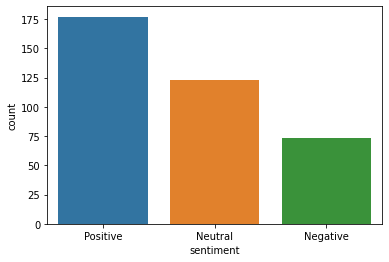

In [37]:
sns.countplot(tweets_df['sentiment'])